In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [2]:
inventory_core = pd.read_csv('../heatherkayb_capstone/data/RDC_Inventory_Core_Metrics_Zip_History.csv')

In [3]:
inventory_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864853 entries, 0 to 1864852
Data columns (total 40 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   month_date_yyyymm                        int64  
 1   postal_code                              int64  
 2   zip_name                                 object 
 3   median_listing_price                     float64
 4   median_listing_price_mm                  float64
 5   median_listing_price_yy                  float64
 6   active_listing_count                     float64
 7   active_listing_count_mm                  float64
 8   active_listing_count_yy                  float64
 9   median_days_on_market                    float64
 10  median_days_on_market_mm                 float64
 11  median_days_on_market_yy                 float64
 12  new_listing_count                        float64
 13  new_listing_count_mm                     float64
 14  new_listing_count_

In [4]:
inventory_core.postal_code.unique()

array([17572, 60083, 32461, ..., 33927, 44648, 75849], dtype=int64)

month_date_yyyymm
201607    68.292599
201608    68.822255
201609    68.339188
201610    65.951055
201611    64.160435
            ...    
202111    19.786203
202112    17.431661
202201    14.904632
202202    13.929269
202203    14.045786
Name: active_listing_count, Length: 69, dtype: float64
    yyyymm  avg_active_listings
0   201607            68.292599
1   201608            68.822255
2   201609            68.339188
3   201610            65.951055
4   201611            64.160435
..     ...                  ...
64  202111            19.786203
65  202112            17.431661
66  202201            14.904632
67  202202            13.929269
68  202203            14.045786

[69 rows x 2 columns]


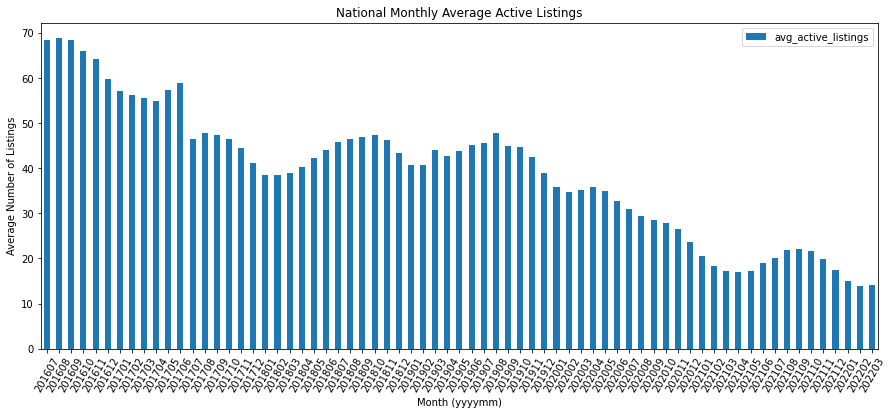

In [5]:
#inventory_core

national_avg_active_listings_by_month = inventory_core.groupby('month_date_yyyymm')['active_listing_count'].mean()
#avg_active_listings_by_month = avg_active_listings_by_month.sort_values(ascending=False)
print(national_avg_active_listings_by_month)

national_avg_active_listings_by_month_df = pd.DataFrame(national_avg_active_listings_by_month)
national_avg_active_listings_by_month_df.reset_index(inplace=True)
national_avg_active_listings_by_month_df.columns = ['yyyymm', 'avg_active_listings']
print(national_avg_active_listings_by_month_df)

national_avg_active_listings_by_month_df.plot(x='yyyymm', y='avg_active_listings', kind='bar')
plt.title('National Monthly Average Active Listings')
plt.ylabel('Average Number of Listings')
plt.xlabel('Month (yyyymm)')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 6)  
plt.show();

month_date_yyyymm
201607    373349.937582
201608    371641.919468
201609    373922.500515
201610    373255.325928
201611    377555.164695
              ...      
202111    521675.994212
202112    529358.153266
202201    542588.632858
202202    557624.931757
202203    560800.745446
Name: average_listing_price, Length: 69, dtype: float64
    yyyymm  average_listing_price
0   201607          373349.937582
1   201608          371641.919468
2   201609          373922.500515
3   201610          373255.325928
4   201611          377555.164695
..     ...                    ...
64  202111          521675.994212
65  202112          529358.153266
66  202201          542588.632858
67  202202          557624.931757
68  202203          560800.745446

[69 rows x 2 columns]


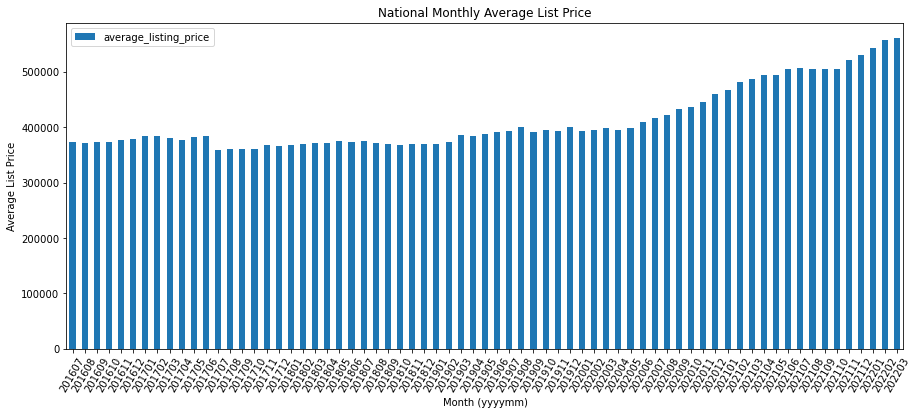

In [6]:
national_avg_list_price_by_month = inventory_core.groupby('month_date_yyyymm')['average_listing_price'].mean()
#avg_active_listings_by_month = avg_active_listings_by_month.sort_values(ascending=False)
print(national_avg_list_price_by_month)

national_avg_list_price_by_month_df = pd.DataFrame(national_avg_list_price_by_month)
national_avg_list_price_by_month_df.reset_index(inplace=True)
national_avg_list_price_by_month_df.columns = ['yyyymm', 'average_listing_price']
print(national_avg_list_price_by_month_df)

national_avg_list_price_by_month_df.plot(x='yyyymm', y='average_listing_price', kind='bar')
plt.title('National Monthly Average List Price')
plt.ylabel('Average List Price')
plt.xlabel('Month (yyyymm)')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 6)  
plt.show();

In [7]:
national_avg_active_listings_by_month_df.to_csv('national_avg_active_listings_by_month.csv')

In [8]:
national_avg_list_price_by_month_df.to_csv('national_avg_list_price_by_month.csv')

In [9]:
zips = [37201, 37203, 37204, 37205, 37206, 37027, 37208, 37209, 37210, 37211, 37212, 37214, 37215, 37216, 37217, 37218, 37219, 37220, 37221, 37228, 37013, 37072, 37076, 37115, 37138]
core_zips = inventory_core.loc[inventory_core['postal_code'].isin(zips)]
core_zips

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
1790,202203,37072,"goodlettsville, tn",614450.0,0.1224,0.9642,12.0,-0.0769,-0.5556,13.0,...,767000.0,0.3083,0.7541,32.0,0.0667,-0.4074,1.5833,0.2756,0.5833,1.0
1801,202203,37217,"nashville, tn",309450.0,0.2358,0.1465,33.0,0.1786,0.2222,26.0,...,314577.0,0.0424,0.1240,88.0,0.2571,0.4915,1.5152,0.0509,0.3300,1.0
2919,202203,37220,"nashville, tn",1595000.0,0.0000,0.1193,2.0,1.0000,-0.8462,61.0,...,1227067.0,0.1468,-0.3524,2.0,0.0000,-0.9231,0.0000,-1.0000,-1.0769,1.0
4671,202203,37214,"nashville, tn",364900.0,0.1677,0.1679,12.0,0.5000,-0.4783,4.0,...,358377.0,-0.0316,0.0050,29.0,0.0741,-0.5167,1.4167,-0.9583,-0.1051,1.0
4677,202203,37218,"nashville, tn",447403.0,-0.0469,0.4550,8.0,-0.3846,-0.5294,20.0,...,476435.0,0.0156,0.5122,79.0,0.0128,1.0256,8.7500,3.7500,7.2794,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821481,201609,37206,"nashville, tn",419900.0,NaN,NaN,264.0,NaN,NaN,32.0,...,422674.0,NaN,NaN,265.0,NaN,NaN,0.0038,NaN,NaN,NaN
1834865,201608,37206,"nashville, tn",412400.0,NaN,NaN,241.0,NaN,NaN,33.0,...,418469.0,NaN,NaN,242.0,NaN,NaN,0.0041,NaN,NaN,NaN
1843082,201608,37072,"goodlettsville, tn",247400.0,NaN,NaN,127.0,NaN,NaN,38.0,...,329903.0,NaN,NaN,128.0,NaN,NaN,0.0079,NaN,NaN,NaN
1861004,201607,37072,"goodlettsville, tn",239900.0,NaN,NaN,131.0,NaN,NaN,32.0,...,330211.0,NaN,NaN,132.0,NaN,NaN,0.0076,NaN,NaN,NaN


In [10]:
core_zips_df = pd.DataFrame(core_zips)
core_zips_df.reset_index(inplace=True)
core_zips_df

,index,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,1790,202203,37072,"goodlettsville, tn",614450.0,0.1224,0.9642,12.0,-0.0769,-0.5556,...,767000.0,0.3083,0.7541,32.0,0.0667,-0.4074,1.5833,0.2756,0.5833,1.0
1,1801,202203,37217,"nashville, tn",309450.0,0.2358,0.1465,33.0,0.1786,0.2222,...,314577.0,0.0424,0.1240,88.0,0.2571,0.4915,1.5152,0.0509,0.3300,1.0
2,2919,202203,37220,"nashville, tn",1595000.0,0.0000,0.1193,2.0,1.0000,-0.8462,...,1227067.0,0.1468,-0.3524,2.0,0.0000,-0.9231,0.0000,-1.0000,-1.0769,1.0
3,4671,202203,37214,"nashville, tn",364900.0,0.1677,0.1679,12.0,0.5000,-0.4783,...,358377.0,-0.0316,0.0050,29.0,0.0741,-0.5167,1.4167,-0.9583,-0.1051,1.0
4,4677,202203,37218,"nashville, tn",447403.0,-0.0469,0.4550,8.0,-0.3846,-0.5294,...,476435.0,0.0156,0.5122,79.0,0.0128,1.0256,8.7500,3.7500,7.2794,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1821481,201609,37206,"nashville, tn",419900.0,NaN,NaN,264.0,NaN,NaN,...,422674.0,NaN,NaN,265.0,NaN,NaN,0.0038,NaN,NaN,NaN
1435,1834865,201608,37206,"nashville, tn",412400.0,NaN,NaN,241.0,NaN,NaN,...,418469.0,NaN,NaN,242.0,NaN,NaN,0.0041,NaN,NaN,NaN
1436,1843082,201608,37072,"goodlettsville, tn",247400.0,NaN,NaN,127.0,NaN,NaN,...,329903.0,NaN,NaN,128.0,NaN,NaN,0.0079,NaN,NaN,NaN
1437,1861004,201607,37072,"goodlettsville, tn",239900.0,NaN,NaN,131.0,NaN,NaN,...,330211.0,NaN,NaN,132.0,NaN,NaN,0.0076,NaN,NaN,NaN


In [11]:
core_zips_df.to_csv('Nashville_zip_data.csv')

In [12]:
year_2017 = [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712]
year_2017 = core_zips.loc[core_zips['month_date_yyyymm'].isin(year_2017)]
year_2017

,index,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
1224,1451977,201712,37215,"nashville, tn",849000.0,0.0168,0.0113,201.0,-0.0864,-0.0864,...,1119651.0,0.0016,-0.0737,230.0,-0.1544,0.0407,0.1443,-0.0784,0.1397,0.0
1225,1452292,201712,37214,"nashville, tn",256000.0,0.0020,0.1907,38.0,-0.0256,-0.3559,...,272700.0,0.0262,0.2176,61.0,-0.1159,0.0339,0.6053,-0.1896,NaN,0.0
1226,1454471,201712,37208,"nashville, tn",379900.0,0.0000,-0.0157,134.0,-0.0074,-0.0822,...,410560.0,0.0012,-0.0047,160.0,0.0000,0.0959,0.1940,0.0163,NaN,1.0
1227,1455183,201712,37211,"nashville, tn",310000.0,0.0353,0.2405,129.0,-0.0719,-0.1569,...,324145.0,0.0206,0.1472,203.0,-0.0814,0.3268,0.5581,-0.0606,NaN,0.0
1228,1457818,201712,37219,"nashville, tn",359900.0,0.1821,-0.2088,13.0,0.3000,-0.0714,...,451369.0,0.0956,-0.1984,16.0,0.1429,0.1429,0.2308,-0.1692,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1707437,201703,37027,"brentwood, tn",779900.0,NaN,NaN,338.0,NaN,NaN,...,1003669.0,NaN,NaN,339.0,NaN,NaN,0.0030,NaN,NaN,NaN
1422,1711646,201702,37027,"brentwood, tn",776950.0,NaN,NaN,300.0,NaN,NaN,...,1009748.0,NaN,NaN,300.0,NaN,NaN,0.0033,NaN,NaN,NaN
1423,1719689,201702,37206,"nashville, tn",407000.0,NaN,NaN,272.0,NaN,NaN,...,420112.0,NaN,NaN,272.0,NaN,NaN,0.0000,NaN,NaN,NaN
1424,1730387,201701,37206,"nashville, tn",402500.0,NaN,NaN,254.0,NaN,NaN,...,418204.0,NaN,NaN,255.0,NaN,NaN,0.0039,NaN,NaN,NaN


In [13]:
zip1 = [37027]
zip_37027 = inventory_core.loc[inventory_core['postal_code'].isin(zip1)]
zip_37027

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
21694,202203,37027,"brentwood, tn",1999000.0,-0.1308,0.4946,40.0,-0.0244,-0.3103,18.0,...,2385440.0,-0.1027,0.4197,81.0,0.0658,-0.3571,1.0250,0.1713,-0.1991,1.0
51841,202202,37027,"brentwood, tn",2299925.0,-0.0800,0.5879,41.0,-0.0465,-0.3492,29.0,...,2658370.0,-0.0470,0.5685,76.0,-0.0380,-0.4198,0.8537,-0.0068,-0.2098,1.0
60263,202201,37027,"brentwood, tn",2499950.0,0.2682,0.7921,43.0,-0.1224,-0.3485,42.0,...,2789439.0,0.1604,0.7375,79.0,-0.1413,-0.4015,0.8605,-0.0375,-0.1547,1.0
94934,202112,37027,"brentwood, tn",1971225.0,0.2131,0.4997,49.0,-0.2462,-0.4167,41.0,...,2403920.0,0.1039,0.6699,92.0,-0.2333,-0.4620,0.8980,0.0980,-0.1378,1.0
129505,202111,37027,"brentwood, tn",1624950.0,0.2500,0.2795,65.0,-0.1975,-0.3627,25.0,...,2177695.0,0.1547,0.4738,120.0,-0.1045,-0.3846,0.8000,0.1457,-0.1020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638385,201706,37027,"brentwood, tn",898000.0,NaN,NaN,321.0,NaN,NaN,41.0,...,1118212.0,NaN,NaN,454.0,NaN,NaN,0.4174,NaN,NaN,NaN
1653531,201705,37027,"brentwood, tn",937400.0,NaN,NaN,296.0,NaN,NaN,37.0,...,1156801.0,NaN,NaN,426.0,NaN,NaN,0.4595,NaN,NaN,NaN
1675032,201704,37027,"brentwood, tn",784900.0,NaN,NaN,386.0,NaN,NaN,36.0,...,1000310.0,NaN,NaN,386.0,NaN,NaN,0.0026,NaN,NaN,NaN
1707437,201703,37027,"brentwood, tn",779900.0,NaN,NaN,338.0,NaN,NaN,39.0,...,1003669.0,NaN,NaN,339.0,NaN,NaN,0.0030,NaN,NaN,NaN


In [14]:
zip2 = [37221]
zip_37221 = inventory_core.loc[inventory_core['postal_code'].isin(zip2)]
#zip_37221

In [15]:
zip_37027.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 21694 to 1711646
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date_yyyymm                        62 non-null     int64  
 1   postal_code                              62 non-null     int64  
 2   zip_name                                 62 non-null     object 
 3   median_listing_price                     62 non-null     float64
 4   median_listing_price_mm                  57 non-null     float64
 5   median_listing_price_yy                  57 non-null     float64
 6   active_listing_count                     62 non-null     float64
 7   active_listing_count_mm                  57 non-null     float64
 8   active_listing_count_yy                  57 non-null     float64
 9   median_days_on_market                    62 non-null     float64
 10  median_days_on_market_mm                 57

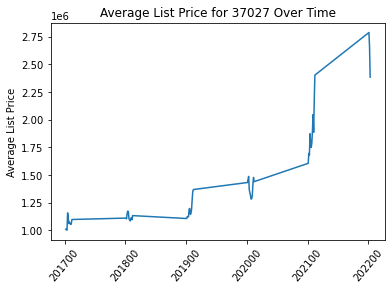

In [16]:
plt.plot(zip_37027.month_date_yyyymm, zip_37027.average_listing_price)
plt.ylabel('Average List Price') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Average List Price for 37027 Over Time');

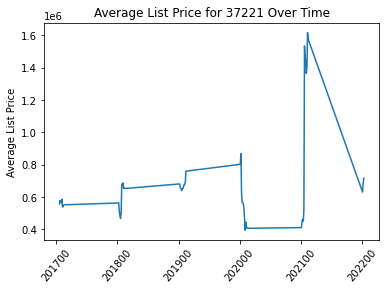

In [17]:
plt.plot(zip_37221.month_date_yyyymm, zip_37221.average_listing_price)
plt.ylabel('Average List Price') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Average List Price for 37221 Over Time');

In [18]:
#inventory_core_zips = inventory_core.loc[inventory_core['postal_code'] == 37027]
#inventory_core_zips

In [19]:
inventory_core.month_date_yyyymm.unique()

array([202203, 202202, 202201, 202112, 202111, 202110, 202109, 202108,
       202107, 202106, 202105, 202104, 202103, 202102, 202101, 202012,
       202011, 202010, 202009, 202008, 202007, 202006, 202005, 202004,
       202003, 202002, 202001, 201912, 201911, 201910, 201909, 201908,
       201907, 201906, 201905, 201904, 201903, 201902, 201901, 201812,
       201811, 201810, 201809, 201808, 201807, 201806, 201805, 201804,
       201803, 201802, 201801, 201712, 201711, 201710, 201709, 201708,
       201707, 201706, 201705, 201704, 201703, 201702, 201701, 201612,
       201611, 201610, 201609, 201608, 201607], dtype=int64)

In [20]:
time_periods = [202203, 202202, 202201, 202112, 202111, 202110, 202109, 202108,
       202107, 202106, 202105, 202104, 202103, 202102, 202101, 202012,
       202011, 202010, 202009, 202008, 202007, 202006, 202005, 202004,
       202003, 202002, 202001, 201912, 201911, 201910, 201909, 201908,
       201907, 201906, 201905, 201904, 201903, 201902, 201901]
time_period_core_zips = core_zips.loc[core_zips['month_date_yyyymm'].isin(time_periods)]
time_period_core_zips

,index,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,1790,202203,37072,"goodlettsville, tn",614450.0,0.1224,0.9642,12.0,-0.0769,-0.5556,...,767000.0,0.3083,0.7541,32.0,0.0667,-0.4074,1.5833,0.2756,0.5833,1.0
1,1801,202203,37217,"nashville, tn",309450.0,0.2358,0.1465,33.0,0.1786,0.2222,...,314577.0,0.0424,0.1240,88.0,0.2571,0.4915,1.5152,0.0509,0.3300,1.0
2,2919,202203,37220,"nashville, tn",1595000.0,0.0000,0.1193,2.0,1.0000,-0.8462,...,1227067.0,0.1468,-0.3524,2.0,0.0000,-0.9231,0.0000,-1.0000,-1.0769,1.0
3,4671,202203,37214,"nashville, tn",364900.0,0.1677,0.1679,12.0,0.5000,-0.4783,...,358377.0,-0.0316,0.0050,29.0,0.0741,-0.5167,1.4167,-0.9583,-0.1051,1.0
4,4677,202203,37218,"nashville, tn",447403.0,-0.0469,0.4550,8.0,-0.3846,-0.5294,...,476435.0,0.0156,0.5122,79.0,0.0128,1.0256,8.7500,3.7500,7.2794,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1089677,201901,37210,"nashville, tn",334650.0,-0.0436,-0.0689,48.0,-0.0769,-0.1579,...,420712.0,-0.0771,-0.0547,59.0,-0.1324,-0.1061,0.2708,0.0016,0.1129,0.0
932,1090526,201901,37211,"nashville, tn",281200.0,-0.0046,-0.0809,146.0,-0.1751,0.4038,...,311049.0,-0.0013,-0.0497,213.0,-0.1050,0.3922,0.4863,0.1247,0.0248,1.0
933,1093226,201901,37072,"goodlettsville, tn",349900.0,-0.0003,-0.0227,89.0,-0.0632,0.3906,...,399216.0,-0.0794,0.0816,113.0,-0.0813,0.1895,0.2809,-0.0033,-0.2191,1.0
934,1096596,201901,37138,"old hickory, tn",274900.0,-0.0004,-0.0834,113.0,-0.0088,0.7121,...,327608.0,-0.0139,-0.0723,140.0,-0.0667,0.6471,0.2389,-0.0330,-0.0489,1.0


In [21]:
median_list_price_by_zip = time_period_core_zips.groupby('postal_code')['median_listing_price'].median()
median_list_price_by_zip = median_list_price_by_zip.sort_values(ascending=False)
print(median_list_price_by_zip)

postal_code
37220    1324988.0
37215    1225000.0
37027    1199000.0
37205     939900.0
37212     812450.0
37204     797450.0
37219     652500.0
37203     566500.0
37206     524994.0
37209     496950.0
37201     449000.0
37210     443900.0
37208     409900.0
37216     389900.0
37221     384400.0
37211     349600.0
37076     349243.0
37072     327990.0
37214     307500.0
37218     300000.0
37138     289900.0
37013     271450.0
37115     271250.0
37217     258400.0
Name: median_listing_price, dtype: float64


In [22]:
avg_active_listings_by_zip = time_period_core_zips.groupby('postal_code')['active_listing_count'].mean()
avg_active_listings_by_zip = avg_active_listings_by_zip.sort_values(ascending=False)
print(avg_active_listings_by_zip)

postal_code
37209    148.025641
37027    146.435897
37215    108.666667
37205    106.692308
37013    102.923077
37208     97.435897
37211     91.897436
37221     88.512821
37203     83.589744
37206     75.410256
37138     74.512821
37076     68.282051
37072     60.692308
37216     59.666667
37115     53.153846
37212     46.307692
37204     45.666667
37214     44.410256
37210     38.512821
37217     37.025641
37219     33.487179
37218     29.615385
37220     19.051282
37201     11.358974
Name: active_listing_count, dtype: float64


In [23]:
avg_active_listings_by_month = time_period_core_zips.groupby('month_date_yyyymm')['active_listing_count'].mean()
#avg_active_listings_by_month = avg_active_listings_by_month.sort_values(ascending=False)
print(avg_active_listings_by_month)

month_date_yyyymm
201901    111.791667
201902    110.583333
201903    106.416667
201904    102.250000
201905    105.250000
201906    104.166667
201907    104.125000
201908    100.458333
201909     98.541667
201910    102.916667
201911     99.250000
201912     90.166667
202001     77.750000
202002     67.416667
202003     66.625000
202004     81.291667
202005     87.958333
202006     86.125000
202007     92.291667
202008     86.666667
202009     80.958333
202010     82.000000
202011     75.916667
202012     66.250000
202101     55.125000
202102     44.666667
202103     39.833333
202104     36.416667
202105     33.916667
202106     36.666667
202107     40.000000
202108     40.625000
202109     40.791667
202110     40.916667
202111     33.916667
202112     26.750000
202201     20.500000
202202     18.333333
202203     20.291667
Name: active_listing_count, dtype: float64


In [24]:
avg_active_listings_by_month_df = pd.DataFrame(avg_active_listings_by_month)
avg_active_listings_by_month_df.reset_index(inplace=True)
avg_active_listings_by_month_df.columns = ['yyyymm', 'avg_active_listings']
print(avg_active_listings_by_month_df)

    yyyymm  avg_active_listings
0   201901           111.791667
1   201902           110.583333
2   201903           106.416667
3   201904           102.250000
4   201905           105.250000
5   201906           104.166667
6   201907           104.125000
7   201908           100.458333
8   201909            98.541667
9   201910           102.916667
10  201911            99.250000
11  201912            90.166667
12  202001            77.750000
13  202002            67.416667
14  202003            66.625000
15  202004            81.291667
16  202005            87.958333
17  202006            86.125000
18  202007            92.291667
19  202008            86.666667
20  202009            80.958333
21  202010            82.000000
22  202011            75.916667
23  202012            66.250000
24  202101            55.125000
25  202102            44.666667
26  202103            39.833333
27  202104            36.416667
28  202105            33.916667
29  202106            36.666667
30  2021

In [25]:
avg_listing_price_by_month = time_period_core_zips.groupby('month_date_yyyymm')['average_listing_price'].mean()
#avg_active_listings_by_month = avg_active_listings_by_month.sort_values(ascending=False)
print(avg_listing_price_by_month)

month_date_yyyymm
201901    5.995744e+05
201902    5.801889e+05
201903    6.050158e+05
201904    6.348345e+05
201905    6.440195e+05
201906    6.444379e+05
201907    6.459546e+05
201908    6.471099e+05
201909    6.499808e+05
201910    6.659662e+05
201911    6.630591e+05
201912    6.765985e+05
202001    6.965815e+05
202002    7.299715e+05
202003    7.143019e+05
202004    6.686818e+05
202005    6.481489e+05
202006    6.551030e+05
202007    6.645984e+05
202008    6.691892e+05
202009    6.680832e+05
202010    6.703434e+05
202011    6.597125e+05
202012    6.518360e+05
202101    6.721581e+05
202102    7.172896e+05
202103    7.518802e+05
202104    7.422258e+05
202105    8.057175e+05
202106    8.666651e+05
202107    8.836409e+05
202108    9.009832e+05
202109    9.214090e+05
202110    8.919280e+05
202111    9.520292e+05
202112    9.965931e+05
202201    9.703042e+05
202202    1.025937e+06
202203    9.912688e+05
Name: average_listing_price, dtype: float64


In [26]:
avg_listing_price_by_month_df = pd.DataFrame(avg_listing_price_by_month)
avg_listing_price_by_month_df.reset_index(inplace=True)
avg_listing_price_by_month_df.columns = ['yyyymm', 'avg_listing_price']
print(avg_listing_price_by_month_df)

    yyyymm  avg_listing_price
0   201901       5.995744e+05
1   201902       5.801889e+05
2   201903       6.050158e+05
3   201904       6.348345e+05
4   201905       6.440195e+05
5   201906       6.444379e+05
6   201907       6.459546e+05
7   201908       6.471099e+05
8   201909       6.499808e+05
9   201910       6.659662e+05
10  201911       6.630591e+05
11  201912       6.765985e+05
12  202001       6.965815e+05
13  202002       7.299715e+05
14  202003       7.143019e+05
15  202004       6.686818e+05
16  202005       6.481489e+05
17  202006       6.551030e+05
18  202007       6.645984e+05
19  202008       6.691892e+05
20  202009       6.680832e+05
21  202010       6.703434e+05
22  202011       6.597125e+05
23  202012       6.518360e+05
24  202101       6.721581e+05
25  202102       7.172896e+05
26  202103       7.518802e+05
27  202104       7.422258e+05
28  202105       8.057175e+05
29  202106       8.666651e+05
30  202107       8.836409e+05
31  202108       9.009832e+05
32  202109

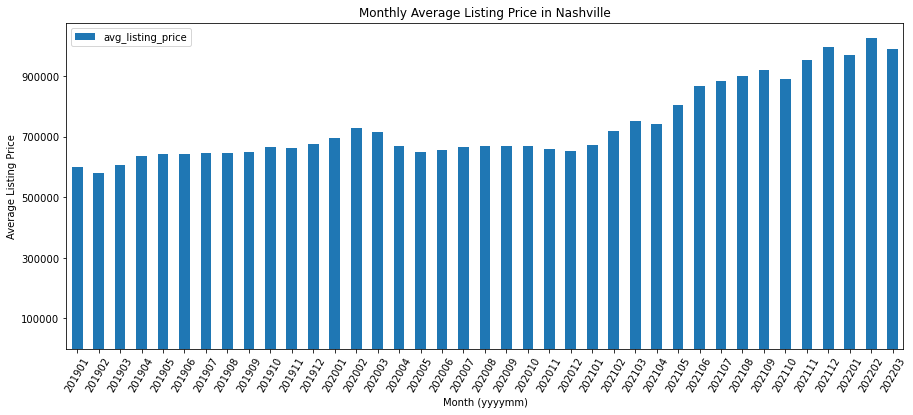

In [27]:
avg_listing_price_by_month_df.plot(x='yyyymm', y='avg_listing_price', kind='bar')
plt.title('Monthly Average Listing Price in Nashville')
plt.ylabel('Average Listing Price')
plt.xlabel('Month (yyyymm)')
plt.xticks(rotation=60)
plt.yticks([100000, 300000, 500000, 700000, 900000])
plt.gcf().set_size_inches(15, 6)  
plt.show();

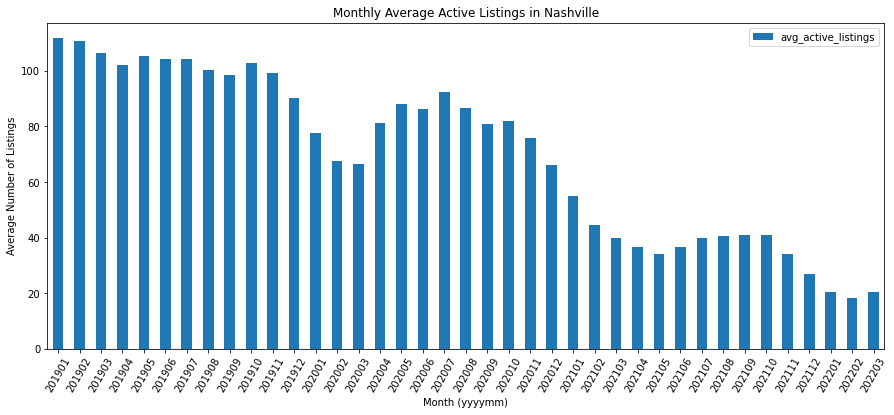

In [28]:
avg_active_listings_by_month_df.plot(x='yyyymm', y='avg_active_listings', kind='bar')
plt.title('Monthly Average Active Listings in Nashville')
plt.ylabel('Average Number of Listings')
plt.xlabel('Month (yyyymm)')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 6)  
plt.show();

In [29]:
denver_core_zips = [80012, 80014, 80110, 80111, 80123, 80202, 80203, 80204, 80205, 80206, 80207, 80209, 80210, 80211, 80212, 80214, 
        80216, 80218, 80219, 80220, 80221, 80222, 80223, 80224, 80226, 80227, 80230, 80231, 80232, 80235, 80236, 80237,
        80238, 80239, 80246, 80247, 80249, 80264, 80290, 80293, 80294]
denver_zips = inventory_core.loc[inventory_core['postal_code'].isin(denver_core_zips)]
#denver_zips

In [30]:
denver_zips_df = pd.DataFrame(denver_zips)
denver_zips_df.reset_index(inplace=True)
denver_zips_df

,index,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,778,202203,80205,"denver, co",697000.0,0.0773,0.1389,27.0,0.0800,-0.3250,...,919665.0,0.0059,-0.1603,97.0,0.1412,-0.2815,2.5556,0.1556,0.1806,0.0
1,859,202203,80246,"denver, co",2150000.0,0.4333,0.9955,4.0,1.0000,-0.5000,...,2375499.0,0.4646,0.9255,14.0,0.0000,-0.2632,2.2500,-2.7500,1.0000,1.0
2,1831,202203,80235,"denver, co",537000.0,-0.4095,0.9714,4.0,0.3333,0.0000,...,870763.0,-0.2934,0.7780,14.0,0.2727,-0.0667,2.5000,-0.1667,-0.2500,1.0
3,1963,202203,80210,"denver, co",1322500.0,0.2857,0.3359,28.0,0.4000,-0.2432,...,1503389.0,0.0582,0.1987,88.0,0.3968,-0.2212,2.1071,-0.0429,0.0531,1.0
4,3520,202203,80231,"denver, co",535000.0,0.5286,1.2766,12.0,0.3333,-0.5000,...,711630.0,0.8962,0.8172,51.0,-0.0377,-0.4333,3.2500,-1.8611,0.4583,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,1861823,201607,80247,"denver, co",219000.0,NaN,NaN,61.0,NaN,NaN,...,234112.0,NaN,NaN,62.0,NaN,NaN,0.0164,NaN,NaN,NaN
2475,1862936,201607,80238,"denver, co",520000.0,NaN,NaN,65.0,NaN,NaN,...,585922.0,NaN,NaN,67.0,NaN,NaN,0.0308,NaN,NaN,NaN
2476,1863215,201607,80227,"denver, co",414900.0,NaN,NaN,47.0,NaN,NaN,...,1129527.0,NaN,NaN,49.0,NaN,NaN,0.0426,NaN,NaN,NaN
2477,1864542,201607,80231,"denver, co",698700.0,NaN,NaN,45.0,NaN,NaN,...,880583.0,NaN,NaN,46.0,NaN,NaN,0.0222,NaN,NaN,NaN


In [31]:
denver_zips_df.to_csv('Denver_zip_data.csv')

Seattle

In [33]:
seattle_core_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98114, 98115, 98116,
                     98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98129, 98131, 98132, 98133, 98134, 98136, 98138,
                     98144, 98145, 98146, 98148, 98151, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98170, 98171,
                     98174, 98177, 98178, 98181, 98184, 98185, 98188, 98190, 98191, 98195, 98198, 98199]
seattle_zips = inventory_core.loc[inventory_core['postal_code'].isin(seattle_core_zips)]

In [34]:
seattle_zips_df = pd.DataFrame(seattle_zips)
seattle_zips_df.reset_index(inplace=True)
seattle_zips_df

,index,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,34,202203,98177,"seattle, wa",1400000.0,-0.2045,0.5135,9.0,0.8000,0.1250,...,1451596.0,-0.1477,0.2241,27.0,0.2857,0.0385,2.0000,-1.0000,-0.3750,1.0
1,461,202203,98102,"seattle, wa",799925.0,0.0217,0.0322,27.0,0.1739,-0.6447,...,1868648.0,0.1411,0.8419,68.0,0.0149,-0.5245,1.5185,-0.2641,0.6633,0.0
2,2767,202203,98105,"seattle, wa",1025000.0,0.0622,0.1681,12.0,-0.0769,-0.5862,...,2214458.0,0.2957,0.7697,40.0,0.0000,-0.3333,2.3333,0.4872,1.2989,1.0
3,3365,202203,98107,"seattle, wa",879950.0,0.0571,0.2572,18.0,0.0000,-0.4857,...,927826.0,0.0908,0.3291,75.0,-0.0385,-0.2105,3.2222,-0.2222,1.5079,0.0
4,3726,202203,98101,"seattle, wa",1069900.0,-0.1763,0.5416,42.0,0.2353,-0.2222,...,1739898.0,-0.0790,0.5219,60.0,0.0345,-0.1667,0.4048,-0.2423,0.0529,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1626990,201707,98146,"seattle, wa",498777.0,-0.0499,0.0179,37.0,0.1563,-0.1591,...,746605.0,-0.0612,0.2317,37.0,0.1563,-0.1591,0.1081,NaN,NaN,0.0
1980,1628030,201707,98107,"seattle, wa",720000.0,0.0323,0.2000,13.0,-0.3500,-0.3500,...,923378.0,0.1026,0.6349,13.0,-0.3500,-0.3500,0.3077,NaN,NaN,0.0
1981,1630078,201707,98188,"seattle, wa",355000.0,-0.0139,0.0146,27.0,0.2273,-0.1818,...,437953.0,0.0221,0.2375,27.0,0.2273,-0.1818,0.2222,NaN,NaN,0.0
1982,1793083,201610,98107,"seattle, wa",659950.0,NaN,NaN,17.0,NaN,NaN,...,626599.0,NaN,NaN,17.0,NaN,NaN,0.0588,NaN,NaN,NaN


In [35]:
seattle_zips_df.to_csv('Seattle_zip_data.csv')

Detroit

In [36]:
detroit_core_zips = [48201, 48202, 48203, 48204, 48205, 48206, 48207, 48208, 48209, 48210, 48211, 48212, 48213, 48214, 48215,
                     48216, 48217, 48218, 48219, 48220, 48221, 48223, 48224, 48225, 48226, 48227, 48228, 48229, 48230, 48233,
                     48234, 48235, 48236, 48237, 48238, 48239, 48240, 48242, 48243]
detroit_zips = inventory_core.loc[inventory_core['postal_code'].isin(detroit_core_zips)]

In [37]:
detroit_zips_df = pd.DataFrame(detroit_zips)
detroit_zips_df.reset_index(inplace=True)
detroit_zips_df

,index,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,1883,202203,48216,"detroit, mi",398500.0,-0.0497,-0.0910,15.0,0.5000,0.2500,...,398330.0,-0.0505,-0.1344,15.0,0.5000,0.1538,0.0667,NaN,-0.0167,1.0
1,2633,202203,48212,"hamtramck, mi",129900.0,-0.0374,0.0608,63.0,0.0678,0.9091,...,126612.0,-0.0321,0.0950,66.0,0.0645,0.6098,0.0476,0.0137,-0.1948,1.0
2,2882,202203,48237,"oak park, mi",199950.0,-0.0362,0.2126,13.0,0.3000,-0.0714,...,215586.0,0.0124,0.2495,19.0,0.1875,0.0000,0.3846,-0.1154,0.0275,0.0
3,3494,202203,48203,"highland park, mi",67500.0,0.0385,0.4454,35.0,-0.1463,-0.1250,...,125479.0,-0.2663,-0.0004,37.0,-0.1957,-0.1591,0.0286,-0.0446,-0.0714,1.0
4,4037,202203,48204,"detroit, mi",39950.0,-0.1491,1.2829,44.0,0.1000,0.6296,...,51888.0,0.0605,0.8695,45.0,0.0465,0.6071,0.0227,-0.0273,-0.0143,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,1853536,201607,48201,"detroit, mi",425000.0,NaN,NaN,19.0,NaN,NaN,...,498062.0,NaN,NaN,20.0,NaN,NaN,0.0526,NaN,NaN,NaN
2218,1854631,201607,48240,"redford, mi",64900.0,NaN,NaN,57.0,NaN,NaN,...,67454.0,NaN,NaN,57.0,NaN,NaN,0.0000,NaN,NaN,NaN
2219,1855536,201607,48221,"detroit, mi",45000.0,NaN,NaN,155.0,NaN,NaN,...,76763.0,NaN,NaN,156.0,NaN,NaN,0.0065,NaN,NaN,NaN
2220,1862320,201607,48238,"detroit, mi",18000.0,NaN,NaN,43.0,NaN,NaN,...,25076.0,NaN,NaN,44.0,NaN,NaN,0.0233,NaN,NaN,NaN


In [38]:
detroit_zips_df.to_csv('Detroit_zip_data.csv')